# Pràctica 1: 

Nom dels alumnes del grup:

> Recordeu que, tot i que la pràctica es fa en parelles, els dos membres del grup han de lliurar al campus virtual aquest notebook.

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes. 

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen? 
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més? 
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.
+ **pyshp** és una biblioteca de Python que es fa servir per a llegir i escriure arxius en el format de fitxers de forma (shapefiles). El format de fitxers de forma és un format estàndard en geoinformàtica i geodèsia per a emmagatzemar i intercanviar dades geoespacials, com ara punts, línies i polígons, juntament amb les seves propietats associades.
+ **shapely** és una biblioteca de Python que es fa servir per a realitzar operacions geomètriques i anàlisi espacial amb objectes geoespacials. Aquesta biblioteca és especialment útil per a treballar amb geometria plana, com ara punts, línies i polígons, i permet realitzar una àmplia gamma d'operacions, com ara interseccions, unions, àrees, longituds i moltes altres.
+ **descartes** és una biblioteca de tercers que es fa servir per a la visualització de gràfics geoespacials.

In [548]:
%%capture
! pip install pyarrow
! pip install pyshp==2.1.3
! pip install shapely==1.7.1
! pip install pandas==1.5.3
! pip install numpy==1.22
! pip install descartes==1.1.0

In [549]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [550]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [551]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [621]:
# Descàrrega de les dades: Trip Record Data 
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)): 
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, com a mínim cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, podem considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa: 
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged. 
- *Passenger_count*: The number of passengers in the vehicle. 
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip. 
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [553]:
# carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament, 
# podeu treballarem amb una mostra uniforme de les dades (1 fila de cada 1000).

def load_table(year, month, sampling = 1000):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime', 
                 'tpep_dropoff_datetime', 
                 'passenger_count', 
                 'trip_distance', 
                 'PULocationID', 
                 'DOLocationID', 
                 'payment_type', 
                 'fare_amount', 
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2020, 4)
test.shape

(239, 9)

In [554]:
test = load_table(2021, 9)
test.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
2954000,2021-09-28 16:09:28,2021-09-28 16:09:58,NaN,14.77,265,250,0,86.20,87.00
2955000,2021-09-28 21:25:55,2021-09-28 21:53:53,NaN,4.05,188,234,0,36.40,46.50
2956000,2021-09-29 08:51:00,2021-09-29 09:33:00,NaN,8.91,157,261,0,31.63,35.18
2957000,2021-09-29 13:28:56,2021-09-29 13:38:08,NaN,1.30,141,262,0,7.50,12.42
2958000,2021-09-29 17:09:10,2021-09-29 18:09:15,NaN,8.21,265,232,0,44.88,45.68
2959000,2021-09-29 22:28:00,2021-09-29 22:45:00,NaN,7.21,142,243,0,26.76,36.58
2960000,2021-09-30 08:00:00,2021-09-30 08:12:00,NaN,1.68,143,237,0,13.20,20.00
2961000,2021-09-30 12:25:05,2021-09-30 12:32:20,NaN,1.29,238,142,0,13.20,20.00
2962000,2021-09-30 16:48:02,2021-09-30 17:54:00,NaN,8.54,170,95,0,32.90,43.00
2963000,2021-09-30 19:17:00,2021-09-30 20:02:55,NaN,10.90,138,181,0,37.50,48.66


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, explora els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [555]:
def clean_data(data, year, month):
    """
    Funció que neteja (una mostra de) les dades per un mes donat.
    """ 
    # AQUÍ EL TEU CODI
    #data = load_table(year,month)
    
    #Eliminem qualsevol fila amb missing data
    data.dropna(how='any', inplace=True) 
    #Eliminem files amb recollida posterior a la finalizació
    data.drop(data[data.tpep_dropoff_datetime<data.tpep_pickup_datetime].index, inplace=True)
    #Eliminem files amb dates incoherents (un trajecte pertany a un mes si es finalizta en aquell mes)
    data.drop(data[data.tpep_dropoff_datetime.dt.month!=month].index, inplace=True) #Mes diferent al mes donat
    data.drop(data[data.tpep_dropoff_datetime.dt.year!=year].index, inplace=True) #Any diferent a l'any donat
    #Eliminem files amb nombres absurds de passatgers (que no estiguin entre 1 i 5, d'acord amb la normativa)
    data.drop(data[(data.passenger_count<1) | (data.passenger_count>5)].index, inplace=True)
    #Eliminem files corresponents a viatges massa llargs o massa curts (considerem que fora del rang 0.1 - 100 milles)
    data.drop(data[(data.trip_distance <0.1) | (data.trip_distance >100)].index, inplace=True)
    #tambe comprovem que no siguin massa llargs en funció del temps (10 hores)
    data.drop(data[(data.tpep_dropoff_datetime-data.tpep_pickup_datetime).astype('timedelta64[h]')>10].index, inplace =True)
    #Eliminem files amb pagaments negatius
    data.drop(data[(data.total_amount<0) | (data.fare_amount<0)].index, inplace=True)
    #Eliminem files amb velocitat mitjana il·legal (65 mph com a màxim, d'acord amb https://www.speed-limits.com/newyork)
    data.drop(data[(data.trip_distance/((data.tpep_dropoff_datetime-data.tpep_pickup_datetime).dt.total_seconds()/3600))>65].index, inplace=True)
    return data

In [556]:
test.shape
clean_data(test,2021,9)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,87,229,1,16.0,21.80
1000,2021-09-01 00:13:00,2021-09-01 00:32:24,3.0,4.53,141,249,1,16.5,22.33
2000,2021-09-01 01:38:25,2021-09-01 01:47:25,2.0,1.70,68,107,1,8.5,14.75
3000,2021-09-01 03:44:18,2021-09-01 03:52:19,1.0,2.36,144,164,1,9.0,15.36
4000,2021-09-01 06:28:27,2021-09-01 06:37:56,2.0,2.55,237,48,2,9.5,12.80
...,...,...,...,...,...,...,...,...,...
2816000,2021-09-30 22:36:05,2021-09-30 22:57:57,1.0,4.78,68,236,1,19.0,27.36
2817000,2021-09-30 23:36:38,2021-09-30 23:45:44,1.0,2.20,170,43,1,9.0,15.35
2818000,2021-09-30 23:09:59,2021-09-30 23:22:26,1.0,1.91,141,233,2,9.5,13.30
2819000,2021-09-30 23:42:25,2021-09-30 23:51:17,1.0,2.24,68,142,1,9.0,15.36


In [557]:
test.tail()
test.shape

(2657, 9)

###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem trasnformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

In [558]:
def post_processing(data):
    """
    Funció on implementar qualsevol tipus de postprocessament necessari.
    """
    # AQUÍ EL TEU CODI
    #Comencem convertint de milles a km
    data['trip_distance'] = data['trip_distance']*1.609344
    #Afegim una columna per les durades en hores decimals
    data['trip_duration'] = (data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']).dt.total_seconds()/3600
    #Afegim una columna per la velocitaten km/h
    data['mean_velocity'] = data['trip_distance']/((data['trip_duration']))
    return data

In [559]:
post_processing(test)
test.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,mean_velocity
2816000,2021-09-30 22:36:05,2021-09-30 22:57:57,1.0,7.692664,68,236,1,19.0,27.36,0.364444,21.107920
2817000,2021-09-30 23:36:38,2021-09-30 23:45:44,1.0,3.540557,170,43,1,9.0,15.35,0.151667,23.344331
2818000,2021-09-30 23:09:59,2021-09-30 23:22:26,1.0,3.073847,141,233,2,9.5,13.30,0.207500,14.813721
2819000,2021-09-30 23:42:25,2021-09-30 23:51:17,1.0,3.604931,68,142,1,9.0,15.36,0.147778,24.394267
2820000,2021-09-30 22:54:28,2021-09-30 23:22:45,2.0,10.428549,48,87,2,25.0,28.80,0.471389,22.123027


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [560]:
df = pd.concat([clean_data(load_table(year, month), year, month) 
                for year in tqdm(YEARS) 
                for month in tqdm(range(1, 13), leave = False)])
df = post_processing(df)
df.shape

(129129, 11)

In [561]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,mean_velocity
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414016,151,239,1,7.0,9.95,0.111111,21.726144
1000,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073847,148,137,2,8.5,9.80,0.135278,22.722483
2000,2019-01-01 00:50:22,2019-01-01 01:19:44,2.0,12.391949,264,264,1,26.0,31.30,0.489444,25.318397
3000,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253082,249,164,1,7.5,11.40,0.140833,15.998213
4000,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078260,162,137,2,4.0,5.30,0.050000,21.565210


## 3. Visualització de dades anuals

Començarem per obtenir una resposta quantitativa a la pregunta **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [562]:
def bar_plot(ax,df, column, xlabel, ylabel, title):
    """
    Funció que crea una figura de barres a partir del dataframe i 
    la columna que conté la informació
    """
    # AQUÍ EL TEU CODI
    ax.bar(df.index.astype(str),df[column],width = 0.5,color = '#FFC300') #Creem el diagrama de barres en funció de l'index i la columna
  
    #Afegim etiquetes i títol
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    ax.grid(True)
    return ax

+ Visualitza el nombre de viatges de cada any.

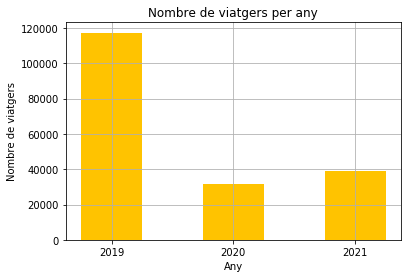

In [563]:
# AQUÍ EL TEU CODI

#Comencem agrupant el nombre de viatgers per any i convertint-ho a dataframe

travelers_per_year = pd.DataFrame(df.groupby(df['tpep_dropoff_datetime'].dt.year)['passenger_count'].sum())

#Fem servir la funció bar_plot per mostrar el diagrama
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
bar_plot(ax,travelers_per_year,'passenger_count','Any','Nombre de viatgers','Nombre de viatgers per any')
plt.show()

+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

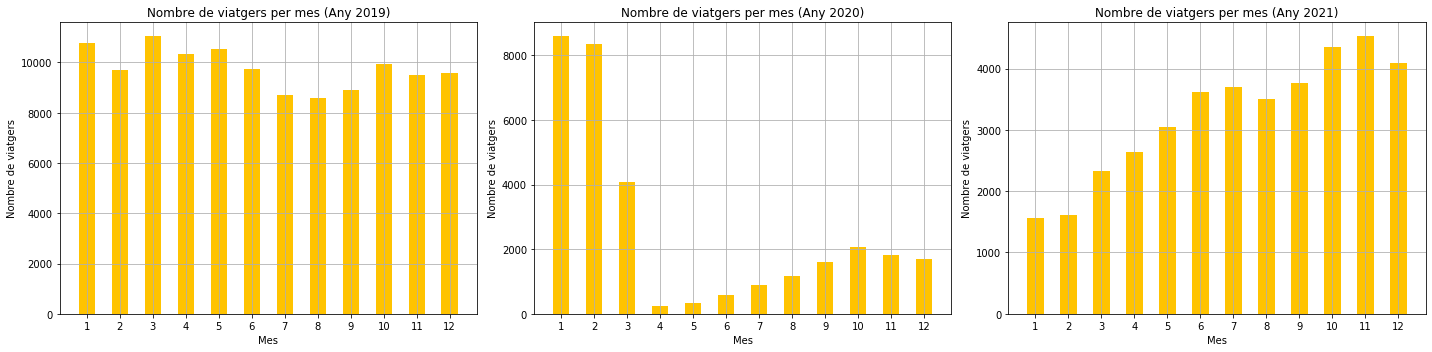

In [564]:
# AQUÍ EL TEU CODI

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, year in enumerate(range(2019, 2022)): #Fem un bucle per tots els anys
    trips_per_year = df[df.tpep_dropoff_datetime.dt.year == year] #reduïm la taula a l'any en concret
    #Classifiquem el nombre de passatgers per mes
    travelers_per_month = pd.DataFrame(trips_per_year.groupby(trips_per_year['tpep_dropoff_datetime'].dt.month)['passenger_count'].sum())
    #Imprimim el diagrama
    
    bar_plot(axs[i],travelers_per_month,'passenger_count','Mes','Nombre de viatgers',f'Nombre de viatgers per mes (Any {year})') 
    
plt.tight_layout()
plt.show()   

+ És el comportament que esperàveu? Per què?

> Resposta: Efectivament és el comportament que esperàvem. Com que sabem, per experiència personal, que els confinaments a causa de la covid es van fer efectius a mitjans del mes de març de 2020, intuïem que hi hauria una davallada significativa del nombre de viatges en taxi a partir d'aquella data i que anirien incrementant-se a mesura que, al llarg dels mesos, la situació sanitària s'anés relaxant.

+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % (utilitzeu el paràmetre *norm = True*).

In [565]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm = False):
    """
    Funció que visualitza quants passatgers hi ha per taxi i per any
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.3
    years = range(2019, 2022)
    colors = ['#FFC300','#FF5733','#C70039']
    for i, year in enumerate(years): #Fem un bucle per tots els anys
        trips_per_year = df[df.tpep_dropoff_datetime.dt.year == year] #reduïm la taula a l'any en concret
        #Calculem el nombre de passatgers per franja de passatgers (de 1 a 5)
        dataframe = pd.DataFrame(trips_per_year.groupby(trips_per_year['passenger_count'])['passenger_count'].size()) 
        
        
        if norm: #Si el paràmatre norm és a true, calculem el percentatge
            total = int(dataframe.sum())#Calculem la suma
            dataframe['passenger_count'] = 100*(dataframe['passenger_count']/total) #Dividem pel total i multipliquem
            
        x = np.arange(len(dataframe))
        ax.bar(x+bar_width*i,dataframe['passenger_count'],width = bar_width,label = str(year),color = colors[i]) #Afegim les barres al gràfic
    #Paràmetres del diagrama
    ax.grid(True) #Graella
   
    ax.set_xlabel(xlabel) #Etiquetes
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(dataframe)) + bar_width * (len(years) / 2)) #Posició de les marques de les abscisses
    ax.set_xticklabels(dataframe.index)
    ax.legend(title='Year') #Llegenda

    plt.ylim(ylim)
    plt.tight_layout()

   
    plt.show()

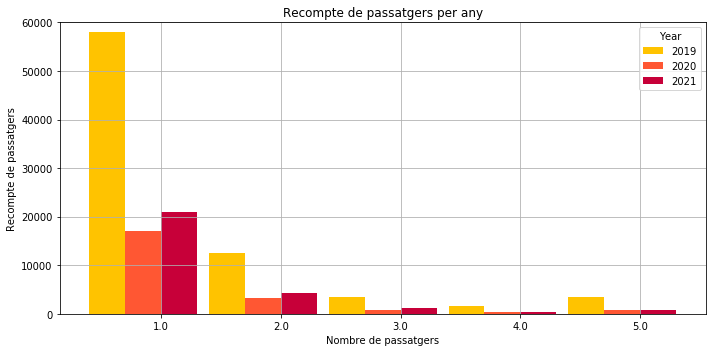

In [566]:
passengers_taxi_year(df, 
                     (0, 60000), 
                     'Nombre de passatgers', 
                     'Recompte de passatgers', 
                     'Recompte de passatgers per any')

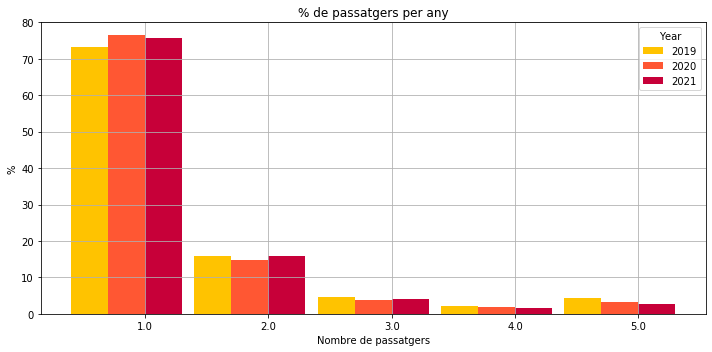

In [567]:
passengers_taxi_year(df, 
                     (0, 80), 
                     'Nombre de passatgers', 
                     '%', 
                     '% de passatgers per any', 
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?

> Resposta: De forma qualitativa podem dir que han disminuït el nombre total de viatges en taxi després del covid. No podem dir, en canvi, que els viatgers optin molt més freqüentment per fer viatges individuals després del covid que abans, ja que el percentatge de viatges amb un sol passatger és sempre prà

+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, etc.).

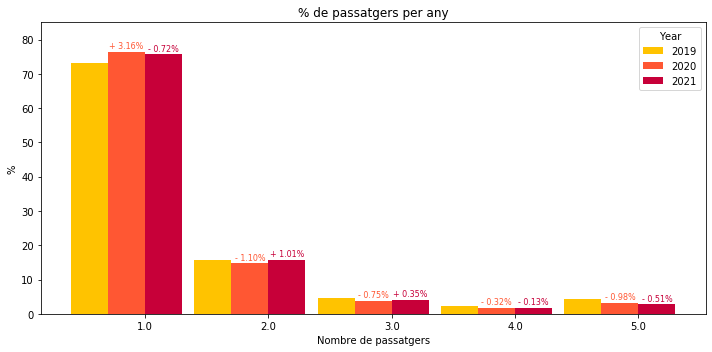

In [568]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def percent_change(df, ylim, xlabel, ylabel, title):
    """
    Function to visualize the percentage of passengers per taxi per year
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.3
    years = range(2019, 2022)
    colors = ['#FFC300', '#FF5733', '#C70039']
    change = [None]
    prev = None

    for i, year in enumerate(years): #Fem un bucle per tots els anys
        trips_per_year = df[df.tpep_dropoff_datetime.dt.year == year]#reduïm la taula a l'any en concret
        #Calculem el nombre de passatgers per franja de passatgers (de 1 a 5)
        dataframe = pd.DataFrame(trips_per_year.groupby(trips_per_year['passenger_count'])['passenger_count'].size())
        total = int(dataframe.sum())#Calculem la suma
        dataframe['passenger_count'] = 100 * (dataframe['passenger_count'] / total)#Dividem pel total i multipliquem

        x = np.arange(len(dataframe))
        ax.bar(x + bar_width * i, dataframe['passenger_count'], width=bar_width, label=str(year), color=colors[i])#Afegim les barres al gràfic
        if i != 0:
            change.append(dataframe - prev)
        # Afegim el percentarge de canvi
            for j, val in enumerate(dataframe['passenger_count']):
                if change[i]["passenger_count"].iloc[j] >= 0: #Si es positiu mostrem el signe +
                    ax.text(x[j] + bar_width * i, val + 1, f'+ {change[i]["passenger_count"].iloc[j]:.2f}%', ha='center', color=colors[i],fontsize=8)
                else:
                    ax.text(x[j] + bar_width * i, val + 1, f'- {abs(change[i]["passenger_count"].iloc[j]):.2f}%', ha='center', color=colors[i],fontsize=8)
        prev = dataframe.copy()
   
    #Paràmetres del diagrama
    ax.grid(False) #Graella
   
    ax.set_xlabel(xlabel) #Etiquetes
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(dataframe)) + bar_width * (len(years) / 2)) #Posició de les marques de les abscisses
    ax.set_xticklabels(dataframe.index)
    ax.legend(title='Year') #Llegenda

    plt.ylim(ylim)
    plt.tight_layout()

   
    plt.show()

percent_change(df, (0, 85), 'Nombre de passatgers', '%', '% de passatgers per any')


+ Descriviu els resultats quantitatius que heu obtingut.

> Resposta: Veiem com el percentatge de viatges amb un sol passatger del 2019 al 2020 incrementa 3.16 punts i del 2020 al 2021 es redueix 0.72 punts.
També hi ha canvis en els viatges amb múltiples viatgers, però en cap dels casos els canvis són significatius.

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc. 

### Exercici D

+ Escriu una funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

In [569]:
import functools


def rgetattr(obj, attr, *args):#Funció extreta d'internet per accedir de forma recursiva als atributs d'un objece
    def _getattr(obj, attr):
        return getattr(obj, attr, *args)
    return functools.reduce(_getattr, [obj] + attr.split('.'))

def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Funció que visualitza els viatges per diferents agregacions de dades
    """
    
    # AQUÍ EL TEU CODI
    
    
    years = range(2019, 2022)
    colors = ['#FFC300', '#FF5733', '#C70039']
    
    criteria = {'pickup_hour':'tpep_pickup_datetime.dt.hour',  #Conversió de les columnes en noms d'atributs del dataframe que cridarem amb rgetattr
                'dropoff_hour':'tpep_dropoff_datetime.dt.hour',
                   'pickup_day':'tpep_pickup_datetime.dt.dayofweek', 
                'dropoff_day':'tpep_dropoff_datetime.dt.dayofweek',
                'pickup_week':'tpep_pickup_datetime.dt.weekofyear',  
                'dropoff_week':'tpep_dropoff_datetime.dt.weekofyear'}
    for column in columns: #Creem una gràfica per columna
        fig, ax = plt.subplots(figsize=(10, 5))
        for i, year in enumerate(years): #Fem un bucle per recórrer els anys
            trips_per_year = df[df.tpep_dropoff_datetime.dt.year == year] #Agrupem els viatges d'aquell any

            #Busquem els viatges en funció de les columnes
            travels_per_weekday = pd.DataFrame(trips_per_year.groupby(rgetattr(trips_per_year,criteria[column])).size())#Busquem el nombre de viatges
            plt.plot(travels_per_weekday.index , travels_per_weekday[0],marker='o', label=str(year), color=colors[i]) #Mostrem les dades

        #Paràmetres de visualització
        ax.grid(True) #Graella
        ax.set_xlabel(xlabel) #Etiquetes
        ax.set_ylabel(ylabel)
        ax.set_title(f'{title} ({column})')
        ax.legend(title='Year') #Llegenda
        plt.tight_layout()

        plt.show()
    
    

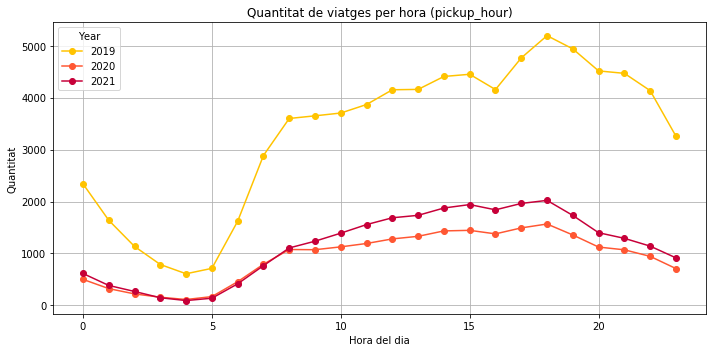

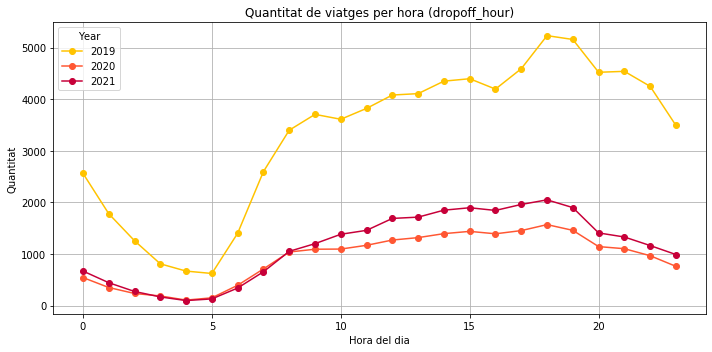

In [570]:
visualize_trips(df, 
                ['pickup_hour', 'dropoff_hour'], 
                title = 'Quantitat de viatges per hora', 
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

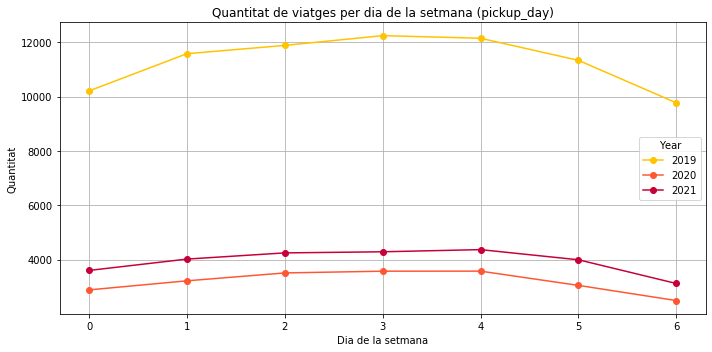

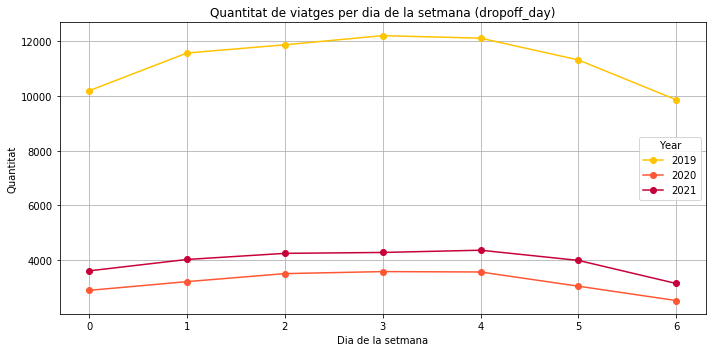

In [571]:
visualize_trips(df, 
                ['pickup_day', 'dropoff_day'], 
                title = 'Quantitat de viatges per dia de la setmana', 
                xlabel = 'Dia de la setmana', 
                ylabel = 'Quantitat')

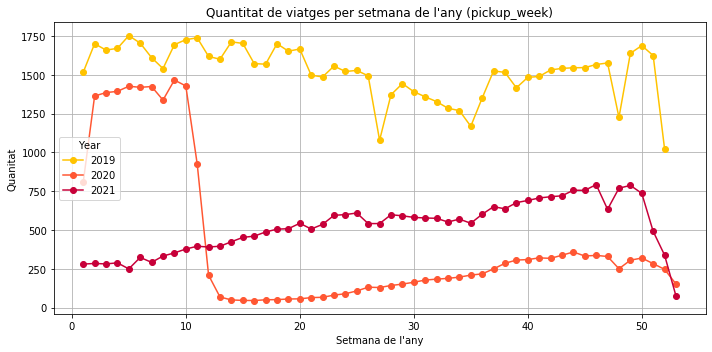

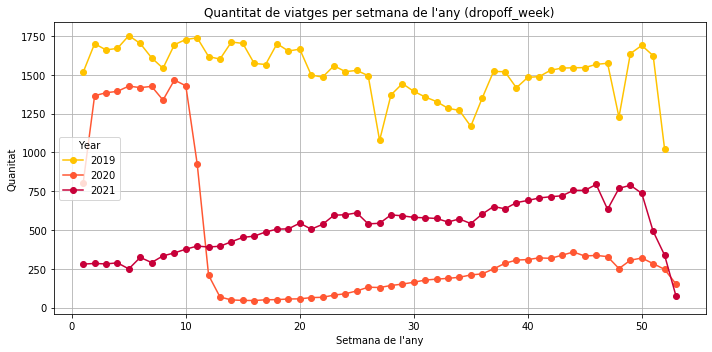

In [572]:
visualize_trips(df, 
                ['pickup_week', 'dropoff_week'], 
                title = 'Quantitat de viatges per setmana de l\'any', 
                xlabel = 'Setmana de l\'any', 
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta: A primera vista, l'efecte de la covid és clarament visible en el descens del nombre total de viatges, tal i com havíem vist amb anterioritat. No observem canvis en funció de l'hora de recollida o de finalització.
>Analitzem els canvis que es produeixen en funció d'hores, dies de la setmana i setmanes:
>
>Al llarg del dia, independentment de l'any, durant la nit s'observa una baixada del nombre de viatges (amb les 4 com a punt més baix) i una crescuda durant al dia (fins les 18, moment en que torna a baixar). L'any 2019, abans del covid, les pujades i baixades són molt més pronunciades.
>
>Analitzant les dades per dies de la setmana tampoc s'observen grans canvis en funció de l'any. En tots els anys hi ha menys viatges en cap de setmana
>
>Si mirem les dades en funció de les setmanes de l'any, sí que podem veure com l'any 2019 és un any amb més viatges i amb més variacions degudes a l'estacionalitat. Aquestes variacions no s'observen tant clarament els altres anys, a excepció de les últimes setmanes de l'any. A l'any 2020 es pot observar com, a partir de la setmana 10, degut probablement a l'aplicació de mesures restrictives de la mobilitat, el nombre de viatges cau en picat. A partir d'aquí creix de forma més o menys constant tal com ja havíem vist a l'anàlisi per mesos.

## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

In [616]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Funció que crea un histograma a partir de la informació que conté la columna del dataframe
    """
     # AQUÍ EL TEU CODI
    df_col = {'trip_distance':'trip_distance','trip_duration':'trip_duration', 'speed':'mean_velocity'}
    
   
    colors = ['#FFC300', '#FF5733', '#C70039']
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    for i, year in enumerate(range(2019, 2022)): #Fem un bucle per tots els anys
        trips_per_year = df[df.tpep_dropoff_datetime.dt.year == year] #reduïm la taula a l'any en concret
         #Imprimim l'histograma
        axs[i].hist(trips_per_year[df_col[column]],color = colors[i],edgecolor='black')
       
        axs[i].set_title(f'{year}')
        axs[i].set_xlabel(xlabel) #Etiquetes
        axs[i].set_ylabel(ylabel)
        axs[i].set_xlim(xlim)
        
    plt.suptitle(title,y=1.1,fontsize = 15)    
    plt.tight_layout()
    plt.show()  
    

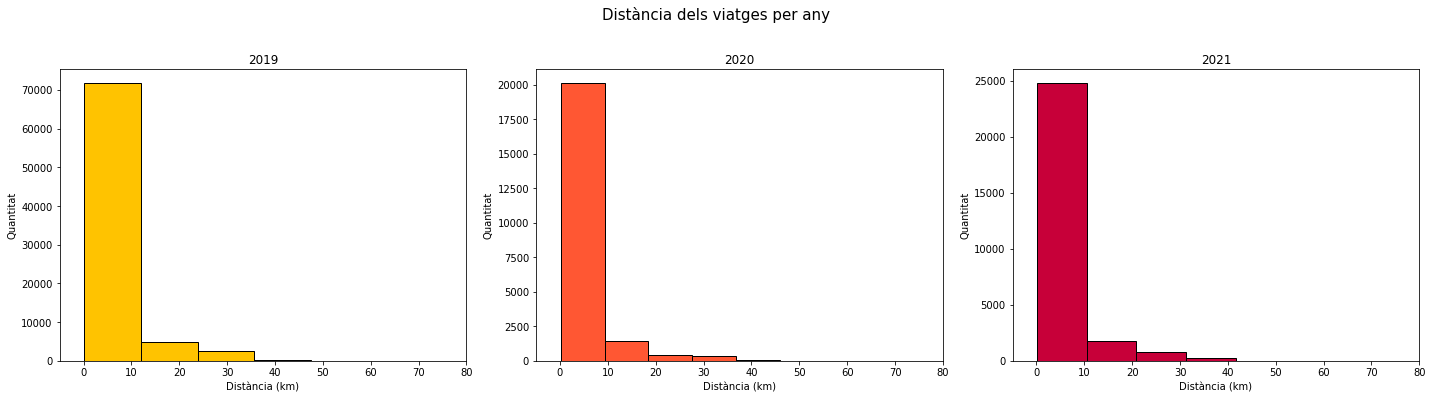

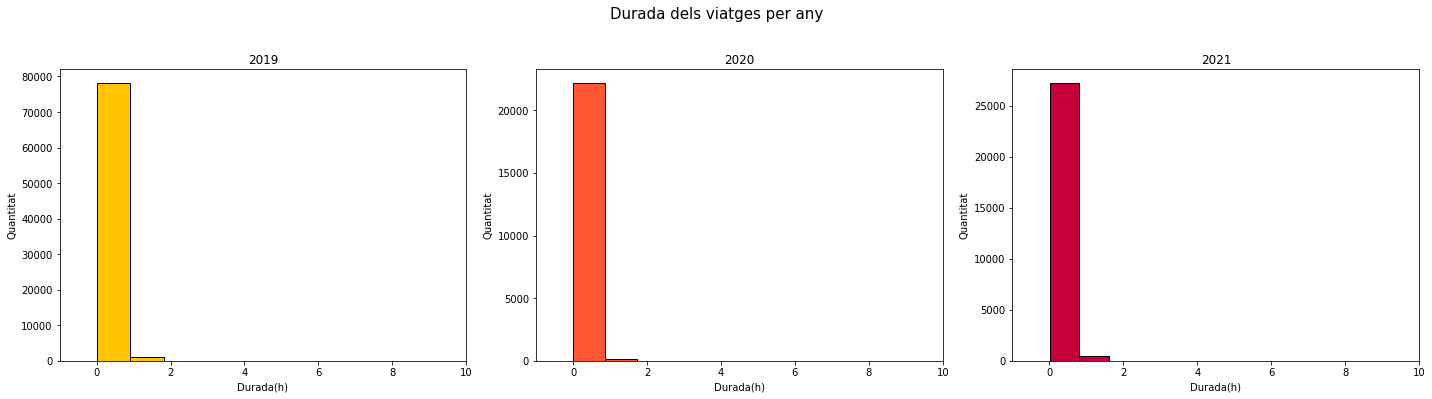

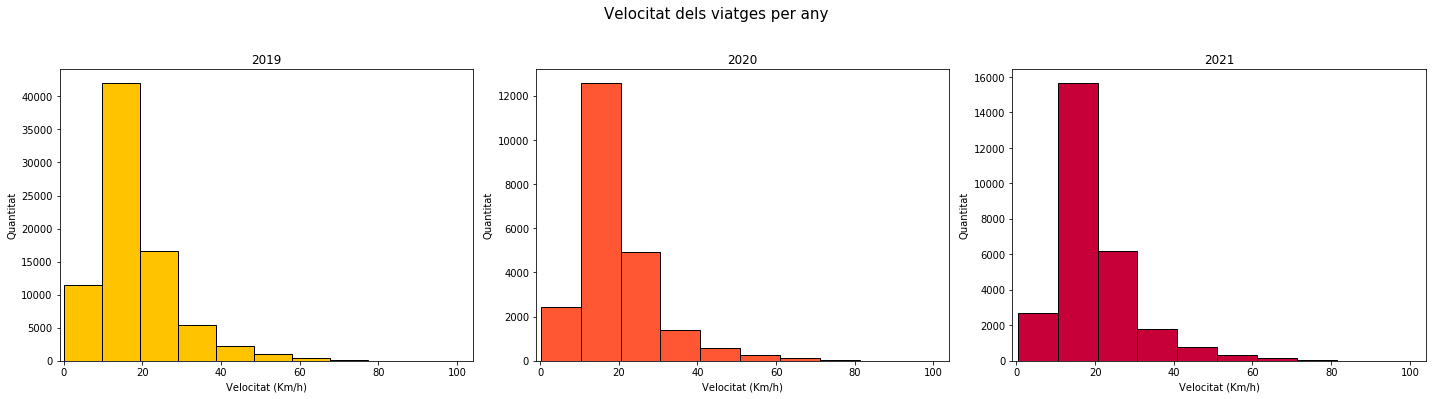

In [617]:
visualize_histograms(df, 'trip_distance', title = 'Distància dels viatges per any', 
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 80))
visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any', 
                     xlabel = 'Durada(h)', ylabel = 'Quantitat', xlim = (-1, 10))
visualize_histograms(df, 'speed', title = 'Velocitat dels viatges per any', 
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quantitat', xlim = (-1, 104))



* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> Resposta: A grans trets, la covid no fa afectar a les distàncies i les durades dels viatges. La majoria es segueixen concentrant a la franja de menys de 10 km de distància i de menys d'una hora de durada.

* I a la velocitat dels taxis?

> Resposta: Pel que fa a la velocitat dels taxis tampoc s'observen canvis significatius.

## 6. Visualització de les localitzacions dels viatges

In [618]:
column_names = df.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'trip_duration', 'mean_velocity']


Només tenim la ID d'una localització, per tant, necessitem aconseguir la latitud i la longitud.

La mateixa pàgina dels taxis ens dóna el fitxer *taxi_zones.zip*, però primer cal que convertim les dades de coordenades amb format WGS84.

Podem utilitzar aquesta web: https://mygeodata.cloud/

In [622]:
from utils import get_lat_lon, draw_region_map, draw_zone_map

In [623]:
sf = shapefile.Reader('data/geodata/taxi_zones.shp')

fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [631]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf, shp_dic).set_index("LocationID"), on="LocationID")
df_loc.tail()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718
259,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595
262,263,0.037017,0.000066,Yorkville West,263,Manhattan,9.978183e+05,223006.185937


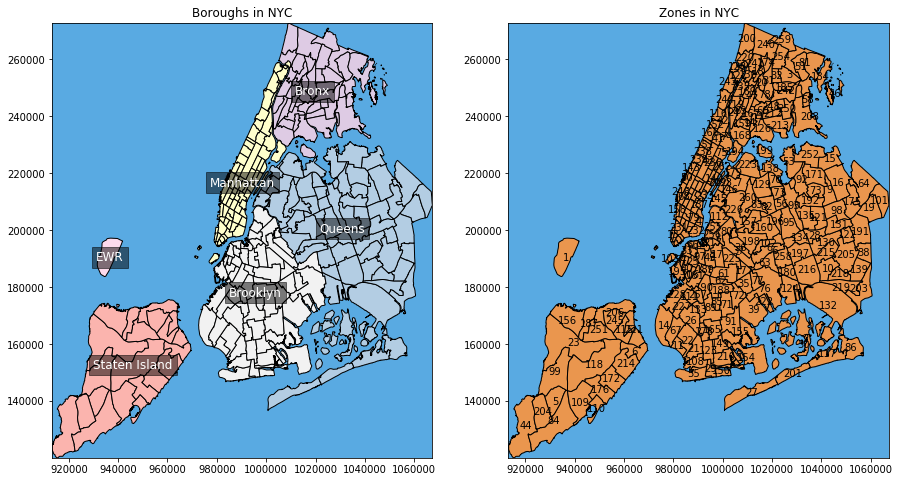

In [625]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf, shp_dic)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, shp_dic)

### Exercici F 

+ Ara teniu dos dataframe que necessitem unir. Utilitza la funció *merge* de Pandas per crear un nou dataframe (conserva el dataframe `df`), anomenat `merge`, que contingui la longitud i latitud (del punt de recollida i del punt de destí) a cada fila. 

In [663]:
# AQUÍ EL TEU CODI

#Fem servir un dataframe temporal per seleccionar les columnes que volem i fer un canvi de nom del dropoff
temp = df_loc[['longitude','latitude','LocationID']].rename(columns={'longitude':'DOLongitude',
                                                                                      'latitude':'DOLatitude',
                                                                                      }) 
merge = df.merge(temp,how='left',left_on = 'DOLocationID', right_on = 'LocationID') #Unim els dos dataframes
merge.drop('LocationID', axis=1, inplace=True) #Eliminem la columna de location sobrant
#Fem el mateix pel pickup
temp = df_loc[['longitude','latitude','LocationID']].rename(columns={'longitude':'PULongitude',
                                                                                      'latitude':'PULatitude',
                                                                                      }) 
merge=merge.merge(temp,how='left',left_on = 'PULocationID', right_on = 'LocationID') #Unim els dos dataframes
merge.drop('LocationID', axis=1, inplace=True) #Eliminem la columna de location sobrant

merge.dropna(how='any',inplace=True) #Eliminem els viatges amb localtizacions que no coincideixen 

In [664]:
merge.shape

(127922, 15)

In [665]:
merge.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,mean_velocity,DOLongitude,DOLatitude,PULongitude,PULatitude
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414016,151,239,1,7.0,9.95,0.111111,21.726144,990139.871381,224918.916683,993048.448746,229960.162885
1,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073847,148,137,2,8.5,9.80,0.135278,22.722483,990575.781160,209001.824133,986837.853249,201264.700017
3,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253082,249,164,1,7.5,11.40,0.140833,15.998213,988216.720995,212188.335350,983705.301510,206915.068701
4,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078260,162,137,2,4.0,5.30,0.050000,21.565210,990575.781160,209001.824133,991876.747966,215015.150630
5,2019-01-01 00:29:00,2019-01-01 00:46:19,1.0,4.361322,161,262,1,13.5,17.76,0.288611,15.111415,999443.497242,222247.381595,990433.407940,215448.355221


## 7. Quines zones de NY tenen més recollides i quines zones tenen més arribades?

En aquest apartat volem conèixer i visualitzar les zones on els taxis són més utilitzats.

El primer pas és ordenar i guardar en una variable els llocs més comuns en la recollida i el destí.

### Exercici G
+  Escriu una funció `show_top_n` que imprimeix els 5 llocs més freqüents de recollida i els 5 llocs més freqüents d'arribada, per cada any.

In [ ]:
n_top = 5
def show_top_n(df, column, df_loc, n_top = n_top):
    """
    Funció que mostra els llocs més usuals per any
    """
    # AQUÍ EL TEU CODI
    pass

In [ ]:
show_top_n(top_pu, 'PULocationID', df_loc)

In [ ]:
show_top_n(top_do, 'DOLocationID', df_loc)

Visualitzem amb un mapa de calor quines són les zones més recurrents.

In [ ]:
for year in YEARS:
    
    PUcount = {k:v for k, v in top_do[top_do.year == year][['DOLocationID', 'trip_distance']].values}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"Zones with most pickups - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"Zones with most drop-offs - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])

+ Per què creieu que la zona de Manhattan té més quantitat de viatges?

> Resposta: 

## 8. Hospitals

Com ha canviat la destinació dels viatges? Hi ha més viatges a les zones on hi ha grans hospitals?

A la següent cel·la us donem la creació manual d'un DataFrame amb la localització més important dels hospitals de Nova York.

In [ ]:
hospitals = [('New York’s Presbyterian Lower Manhattan Hospital, NYC, NY, USA', '40.710255', '-74.005058'),
('Manhattan Gastroenterology, NYC, NY, USA', '40.778259', '-73.958092'),
('Stem Cell Therapy Hospital, NYC, NY, USA', '40.601517', '-73.961067'),
('Park Avenue Smiles, Yonkers, NYC, NY, USA', '40.945873', '-73.890671'),
('Cosmetic Dentistry Center, NYC, NY, USA', '40.629234', '-74.026077'),
('Envy Smile Dental Spa, Brooklyn, NYC, NY, USA', '40.607059', '-73.960144'),
('VIVA EVE, Forest Hills, NYC, NY, USA', '40.734291', '-73.849434'),
('Forest Hills Medical Services, Queens, NYC, NY, USA', '40.734310', '-73.849510'),
('Professional Gynecological Services, Brooklyn, NY, NY, USA', '40.689747', '-73.982346'),
('Manhattan Womens Health & Wellness, New York, NY, USA', '40.741997', '-73.986107'),
('Brooklyn Abortion Clinic, Brooklyn, NY, New York, USA', '40.689743', '-73.982368'),
('Brooklyn GYN Place, Brooklyn, NY, USA', '40.692696', '-73.993584'),
('Americas Holistic Doctor, NYC, NY, USA', '40.742531', '-73.985489'),
('NJS Physical Medicine & Rehabilitation, Brooklyn, NY, USA', '40.641621', '-73.956734'),
('DHD Medical, Brooklyn New York, USA', '40.625568', '-73.918320'),
('Workers Compensation Doctor, New York, NY, USA', '40.652225', '-74.006104'),]

hospitals = pd.DataFrame(hospitals, columns = ['Place Name', 'Latitude', 'Longitude'])
hospitals['Latitude'] = hospitals['Latitude'].astype(float)
hospitals['Longitude'] = hospitals['Longitude'].astype(float)
hospitals.head()

### Exercici H

+ Utilitza la latitud i longitud de cada hospital i la de les zones del dataframe *merge* per veure la relació entre la distribució dels hospitals i la dels viatges. Per fer-ho utilitza els gràfics de dispersió. Recorda que s'entendrà millor si els punts són transparents (paràmetre *alpha*).

+ Després repeteix el mateix gràfic però separat per any. 

In [ ]:
def scatter_locations(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    # AQUÍ EL TEU CODI
    pass

In [ ]:
scatter_locations(merge, hospitals)

In [ ]:
def scatter_locations_per_year(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    # AQUÍ EL TEU CODI
    pass

In [ ]:
scatter_locations_per_year(merge, hospitals)

* Veus algun comportament interessant per comentar?
> Resposta: 